<h3> Reuters Articles Classification using Topic Models in Gensim </h3>

In [2]:
from nltk.corpus import reuters
import gensim

C:\Users\nwalker018\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL
C:\Users\nwalker018\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\nwalker018\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
#for fileid in reuters.fileids():
    #print(reuters.raw(fileid))

In [4]:
docs = []

In [5]:
for fileid in reuters.fileids():
    docs.append(reuters.raw(fileid))

In [6]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [7]:
docs = [w.replace('U.S.', 'USA')  for w in docs]
docs = [w.replace('mln', 'million')  for w in docs]
docs = [w.replace('dlrs', 'dollars')  for w in docs]
docs = [w.replace('pct', 'percent')  for w in docs]
docs = [w.replace('said', '')  for w in docs]
docs = [w.replace('shr', 'share')  for w in docs]
docs = [w.replace('net', '')  for w in docs]
docs = [w.replace('ct', 'count')  for w in docs]
docs = [w.replace('wk', 'week')  for w in docs]
docs = [w.replace('v', '')  for w in docs]
docs = [w.replace('qtr', 'quarter')  for w in docs]

In [8]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
    
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''. join(ch for ch in stop_free if ch not in exclude)
    stop_free2 = " ".join([i for i in punc_free.lower().split() if i not in stop])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free2.split())
    return normalized

clean_docs = [clean(doc).split() for doc in docs]

In [9]:
from gensim.corpora import Dictionary

In [10]:
dictionary = Dictionary(clean_docs)
corpus = [dictionary.doc2bow(text) for text in clean_docs]

In [11]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet

<h3> LSI Model: </h3>

In [12]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [13]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.551*"million" + 0.420*"dollar" + 0.229*"percent" + 0.207*"year" + 0.174*"billion" + 0.168*"share" + 0.132*"count" + 0.125*"loss" + 0.120*"usa" + 0.114*"bank"'),
 (1,
  '0.530*"million" + -0.316*"percent" + 0.223*"count" + -0.206*"usa" + 0.192*"loss" + -0.164*"rate" + 0.158*"net" + -0.158*"bank" + -0.156*"would" + -0.145*"market"'),
 (2,
  '-0.905*"nil" + -0.173*"pre" + -0.168*"wk" + -0.168*"4287" + -0.105*"198687" + -0.090*"198788" + -0.086*"total" + 0.064*"dollar" + -0.060*"unnamedb" + -0.060*"eoac"'),
 (3,
  '-0.566*"dollar" + 0.432*"million" + 0.379*"percent" + -0.231*"share" + 0.171*"tonne" + -0.154*"loss" + -0.149*"count" + -0.101*"company" + 0.094*"january" + -0.092*"usa"'),
 (4,
  '0.484*"percent" + 0.305*"billion" + -0.274*"usa" + 0.192*"dollar" + -0.183*"trade" + -0.183*"million" + -0.178*"would" + 0.163*"bank" + -0.160*"tonne" + -0.152*"oil"')]

<h3> HDP Model: </h3>

In [14]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [15]:
hdpmodel.show_topics(num_topics=5)

[(0,
  '0.022*million + 0.016*dollar + 0.009*percent + 0.009*share + 0.008*count + 0.008*year + 0.007*company + 0.006*billion + 0.006*loss + 0.005*would + 0.005*inc + 0.005*net + 0.005*usa + 0.005*price + 0.004*1986 + 0.004*oil + 0.004*corp + 0.004*bank + 0.004*stock + 0.004*profit'),
 (1,
  '0.014*million + 0.012*dollar + 0.011*percent + 0.008*year + 0.008*usa + 0.007*bank + 0.006*billion + 0.006*share + 0.006*would + 0.005*market + 0.005*trade + 0.005*rate + 0.005*company + 0.005*count + 0.004*price + 0.004*hae + 0.004*last + 0.004*1986 + 0.003*oil + 0.003*japan'),
 (2,
  '0.029*million + 0.024*count + 0.019*dollar + 0.017*loss + 0.014*net + 0.013*share + 0.010*shr + 0.009*year + 0.008*profit + 0.008*re + 0.007*inc + 0.006*qtr + 0.006*percent + 0.006*billion + 0.005*corp + 0.005*company + 0.005*sale + 0.005*oper + 0.005*note + 0.004*1986'),
 (3,
  '0.008*dollar + 0.005*billion + 0.005*percent + 0.005*rate + 0.005*usa + 0.004*million + 0.004*bank + 0.004*would + 0.003*year + 0.003*mar

<h3> LDA Model: </h3>

In [16]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [17]:
ldamodel.print_topics(num_topics=5, num_words=10)

[(5,
  '0.030*"million" + 0.027*"tonne" + 0.019*"stg" + 0.013*"usa" + 0.011*"wheat" + 0.010*"export" + 0.009*"corn" + 0.008*"year" + 0.007*"market" + 0.007*"oil"'),
 (2,
  '0.037*"billion" + 0.035*"percent" + 0.021*"dollar" + 0.014*"year" + 0.014*"january" + 0.013*"february" + 0.012*"bank" + 0.011*"1986" + 0.011*"rose" + 0.009*"rise"'),
 (3,
  '0.105*"million" + 0.055*"dollar" + 0.019*"count" + 0.018*"year" + 0.018*"share" + 0.016*"net" + 0.013*"1986" + 0.011*"quarter" + 0.010*"sale" + 0.010*"shr"'),
 (4,
  '0.018*"percent" + 0.014*"year" + 0.011*"rate" + 0.010*"price" + 0.009*"bank" + 0.008*"million" + 0.007*"dollar" + 0.007*"usa" + 0.006*"1986" + 0.006*"1987"'),
 (9,
  '0.032*"share" + 0.018*"stock" + 0.016*"offer" + 0.015*"company" + 0.014*"percent" + 0.010*"group" + 0.010*"common" + 0.010*"inc" + 0.009*"dollar" + 0.008*"shareholder"')]

In [18]:
import pyLDAvis.gensim

In [19]:
pyLDAvis.enable_notebook()

In [20]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

C:\Users\nwalker018\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      17.951604        1       1  0.183567  0.018463
1      11.508606        1       2  0.046072  0.086223
3      11.494385        1       3 -0.193820 -0.111436
2      11.063623        1       4  0.064240 -0.101793
7      10.479755        1       5  0.170806 -0.019141
9       8.833218        1       6 -0.037031  0.181854
5       7.874407        1       7  0.088803 -0.090731
4       7.273335        1       8  0.078784 -0.057706
6       6.835093        1       9 -0.286113 -0.064729
0       6.685974        1      10 -0.115308  0.158996, topic_info=      Category          Freq         Term         Total  loglift  logprob
term                                                                     
165    Default  17430.000000      million  17430.000000  30.0000  30.0000
144    Default   5250.000000         loss   5250.000000  29.0000  29.0000
2444   Default   7137.000000        count   7137.000000  28.0000  28.0000
1524   Default   4082.000000          net   4082.000000  27.0000  27.0000
235    Default   6953.000000        share   6953.000000  26.0000  26.0000
35     Default   5510.000000      billion   5510.000000  25.0000  25.0000
1217   Default   2815.000000          shr   2815.000000  24.0000  24.0000
74     Default  12363.000000       dollar  12363.000000  23.0000  23.0000
1215   Default   3350.000000       profit   3350.000000  22.0000  22.0000
193    Default   8252.000000      percent   8252.000000  21.0000  21.0000
333    Default   2554.000000        tonne   2554.000000  20.0000  20.0000
2518   Default   1959.000000           re   1959.000000  19.0000  19.0000
1332   Default   3668.000000          inc   3668.000000  18.0000  18.0000
2438   Default   1707.000000          qtr   1707.000000  17.0000  17.0000
1006   Default   5310.000000      company   5310.000000  16.0000  16.0000
1218   Default   1564.000000          stg   1564.000000  15.0000  15.0000
983    Default   2796.000000         rate   2796.000000  14.0000  14.0000
697    Default   3093.000000         corp   3093.000000  13.0000  13.0000
21     Default   1817.000000        april   1817.000000  12.0000  12.0000
1120   Default   1864.000000        offer   1864.000000  11.0000  11.0000
613    Default   1749.000000      january   1749.000000  10.0000  10.0000
288    Default   7479.000000         year   7479.000000   9.0000   9.0000
250    Default   3129.000000        stock   3129.000000   8.0000   8.0000
212    Default   1412.000000       record   1412.000000   7.0000   7.0000
2608   Default   1082.000000         oper   1082.000000   6.0000   6.0000
450    Default   3697.000000         1986   3697.000000   5.0000   5.0000
2594   Default    929.000000          4th    929.000000   4.0000   4.0000
1395   Default   1748.000000     february   1748.000000   3.0000   3.0000
268    Default   3167.000000        trade   3167.000000   2.0000   2.0000
440    Default   1265.000000         rose   1265.000000   1.0000   1.0000
...        ...           ...          ...           ...      ...      ...
2912   Topic10    144.311618  undisclosed    186.024495   2.4513  -6.0387
21     Topic10   1022.091414        april   1817.108898   2.1298  -4.0810
1126   Topic10    537.584311        prior    874.960176   2.2181  -4.7236
1164   Topic10    452.393166      diidend    735.219700   2.2195  -4.8961
2235   Topic10    386.413326        split    612.731250   2.2441  -5.0537
7073   Topic10    167.120577      gencorp    250.232147   2.3015  -5.8919
1904   Topic10    118.626665      regular    170.975912   2.3396  -6.2347
729    Topic10    564.840754         unit   1293.327136   1.8767  -4.6741
3814   Topic10     94.756579       intent    129.267278   2.3946  -6.4593
1967   Topic10    471.561864          set   1162.225541   1.8031  -4.8546
13154  Topic10     87.598279         coin    121.924370   2.3745  -6.5379
697    Topic10    933.735619         corp   3093.5126

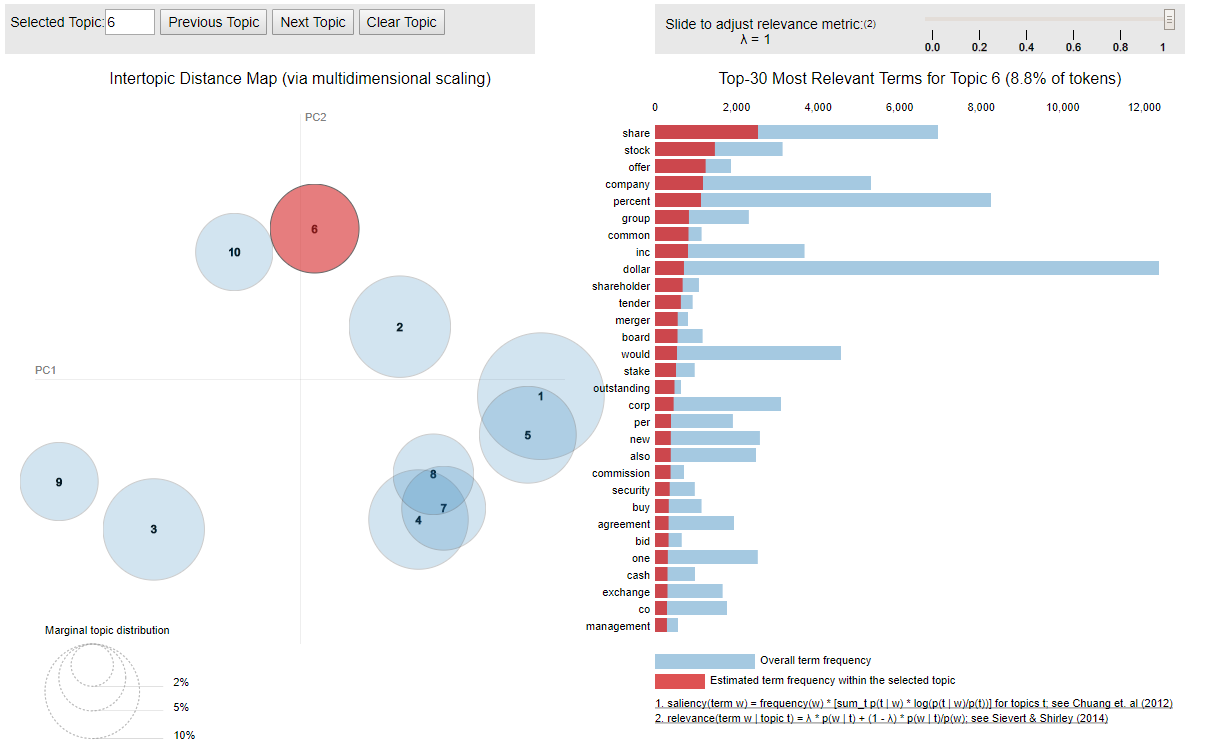![alt text]('C:/Users/nwalker018/Desktop/Capture.png')